In [17]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createDataLinear, createDataCircular
from feedforward import FeedForwardNN, BCELoss

np.set_printoptions(precision = 4, suppress = True)

# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

Data: [x, y, label]
 [[-0.1231 -0.885   0.    ]
 [ 0.7312  0.3317  1.    ]
 [ 0.2553 -0.2212  0.    ]
 [-0.6891 -0.259   0.    ]
 [ 0.0715 -0.461   0.    ]]


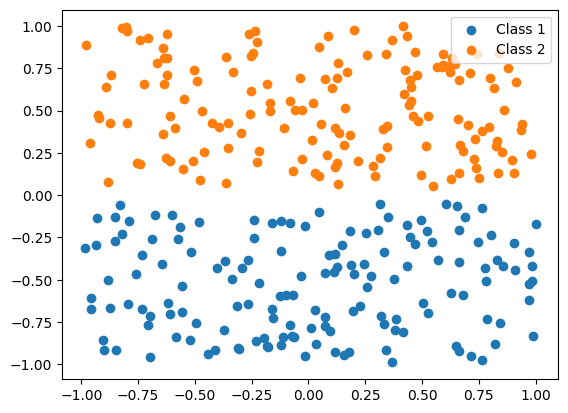

Data: [x, y, label]
 [[ 0.3653 -0.5386  0.    ]
 [-0.143  -0.1193  1.    ]
 [ 0.6049  0.1021  0.    ]
 [-0.0373 -0.1201  1.    ]
 [ 0.5991 -0.603   0.    ]]


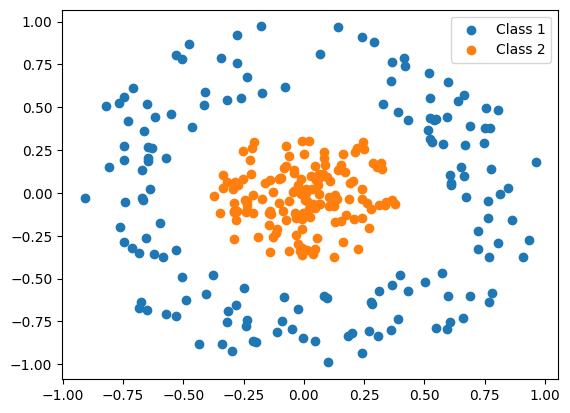

In [18]:
# linear seperable
data_linear = createDataLinear(150, 150)
print("Data: [x, y, label]\n", data_linear[0:5])

# divide into classes
class1_linear = data_linear[np.where(data_linear[:,2] == 0)]
class2_linear = data_linear[np.where(data_linear[:,2] == 1)]

plt.scatter(class1_linear[:,0], class1_linear[:,1], label="Class 1")
plt.scatter(class2_linear[:,0], class2_linear[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

# not linear seperable
data_circular = createDataCircular(150, 150)
print("Data: [x, y, label]\n", data_circular[0:5])

# divide into classes
class1_circular = data_circular[np.where(data_circular[:,2] == 0)]
class2_circular = data_circular[np.where(data_circular[:,2] == 1)]

plt.scatter(class1_circular[:,0], class1_circular[:,1], label="Class 1")
plt.scatter(class2_circular[:,0], class2_circular[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [19]:
# First network, used on the linear data
nn_lin = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 2, hidden_units = [3, 3], activation = "tanh", output_activation = "sigmoid")
weights = nn_lin.weights()
print("First network weights, used on the linear data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

# Second network, used on the circular data
nn_circ = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [10, 10, 10], activation = "tanh", output_activation = "sigmoid")
weights = nn_circ.weights()
print("\nSecond network weights, used on the circular data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

First network weights, used on the linear data:
(3, 2)
[[ 0.013   0.5321]
 [ 0.001  -0.6275]
 [ 0.4526  0.3756]]
(3, 3)
[[ 0.3847 -0.1041 -0.1062]
 [ 0.4048 -0.1871  0.1354]
 [-0.4748  0.4938 -0.2162]]
(1, 3)
[[0.169  0.5115 0.4163]]

Second network weights, used on the circular data:
(10, 2)
[[ 0.5871 -0.2633]
 [ 0.016   0.3247]
 [-0.5482  0.4132]
 [-0.428   0.4444]
 [ 0.0699  0.3697]
 [-0.4366 -0.0698]
 [-0.6268 -0.2934]
 [-0.5259  0.2042]
 [ 0.3435 -0.4555]
 [ 0.5912 -0.3006]]
(10, 10)
[[-0.2009 -0.2807 -0.1195 -0.1042  0.0632  0.1121 -0.0047 -0.1673  0.2819
  -0.1626]
 [ 0.3054  0.1302 -0.0007  0.3128 -0.2355  0.193  -0.2474 -0.0074 -0.2915
  -0.2127]
 [-0.1717 -0.1385  0.1537  0.2571 -0.2733 -0.05    0.1967 -0.1497 -0.0841
   0.2506]
 [ 0.1372  0.195  -0.316   0.061  -0.1168 -0.077  -0.0083  0.2169  0.282
  -0.3007]
 [ 0.0485  0.2865  0.0979  0.127   0.0295  0.0141  0.029  -0.1764  0.1714
   0.2802]
 [ 0.1372 -0.299  -0.228   0.0911  0.2923  0.1059  0.2338  0.1286 -0.0164
  -0.145

### Quick forward call

In [20]:
input = data_linear[0][0:2]
target = data_linear[0][2]
print("Input:", input, "- Label:", data_linear[0][2])
output = nn_lin.forward(input)
print("Model output:", output[0])
loss = BCELoss(output[0], target)
print("BCEloss gives:", loss)

Input: [-0.1231 -0.885 ] - Label: 0.0
Model output: 0.5036315638015816
BCEloss gives: 0.7004368130914973


### Train network on the two classes

In [21]:
# FOR LINEAR DATA
nr_epochs = 20
learning_rate = 0.01
running_loss = 0
loss_linear = []

# training loop (stochastic gradient descent)
for epoch in range(nr_epochs):
    for i in range(data_linear.shape[0]):
        # input
        input = data_linear[i][0:2]
        label = data_linear[i][2]
        
        # forward
        output = nn_lin.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_lin.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_lin.step(learning_rate)

        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_linear.append(running_loss / data_linear.shape[0])
    running_loss = 0

# FOR CIRCULAR DATA (gradient descent)
nr_epochs = 100
learning_rate = 0.005
running_loss = 0
loss_circular = []

# training loop
for epoch in range(nr_epochs):
    # break
    for j in range(data_circular.shape[0]):
        # input
        input = data_circular[j][0:2]
        label = data_circular[j][2]
        
        # forward
        output = nn_circ.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_circ.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_circ.step(learning_rate)
        
        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_circular.append(running_loss / data_circular.shape[0])
    running_loss = 0

### Weights after training


In [22]:
# First network, used on the linear data
weights = nn_lin.weights()
print("First network weights, used on the linear data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

# Second network, used on the circular data
weights = nn_circ.weights()
print("\nSecond network weights, used on the circular data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

First network weights, used on the linear data:
(3, 2)
[[-0.0704  1.9839]
 [ 0.0693 -1.691 ]
 [ 0.3106  0.9225]]
(3, 3)
[[ 1.2278 -0.8748  0.3345]
 [ 1.5718 -1.2703  0.6998]
 [-0.8494  0.8116 -0.3922]]
(1, 3)
[[ 1.7965  2.7969 -1.2778]]

Second network weights, used on the circular data:
(10, 2)
[[ 0.4507 -0.9228]
 [-0.2216  0.604 ]
 [-0.9752  0.4344]
 [-0.5993  0.9466]
 [ 0.9449  1.6626]
 [-0.747  -0.5933]
 [-1.9739 -2.3107]
 [-0.9343  0.3487]
 [ 0.9759 -0.6529]
 [ 0.749  -0.5642]]
(10, 10)
[[ 0.1154 -0.3409 -0.6609 -0.3725  0.6069 -0.2921  0.8291 -0.7121  0.7468
   0.2965]
 [-0.0601  0.2191  0.5091  0.6768 -0.695   0.5262 -0.971   0.487  -0.7704
  -0.6703]
 [-0.3586 -0.0841  0.25    0.4649 -0.1252 -0.075   0.6374 -0.0776 -0.2076
   0.1189]
 [ 0.1017  0.1833 -0.2769  0.0785 -0.1389 -0.0609 -0.0395  0.2544  0.2528
  -0.3392]
 [ 0.0695  0.382   0.0335  0.155   0.2324 -0.0889  0.324  -0.2519  0.21
   0.3391]
 [ 0.2018 -0.286  -0.3004  0.0415  0.3444  0.0687  0.2825  0.0623  0.0441
  -0.0

### Loss graphs

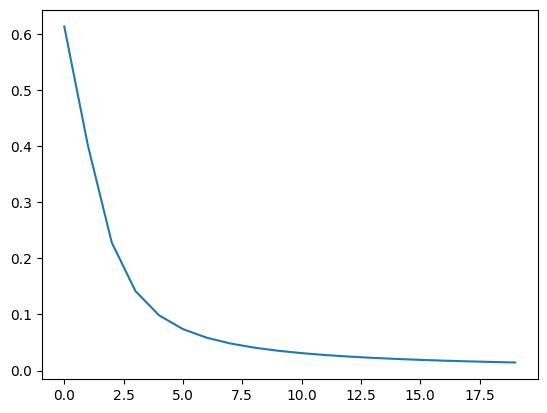

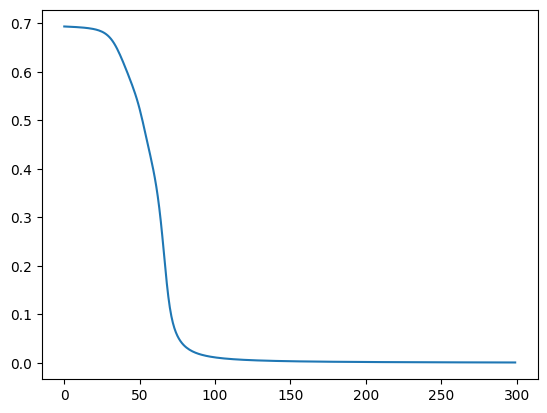

In [23]:
plt.plot(loss_linear)
plt.show()

plt.plot(loss_circular)
plt.show()

### Decision boundary

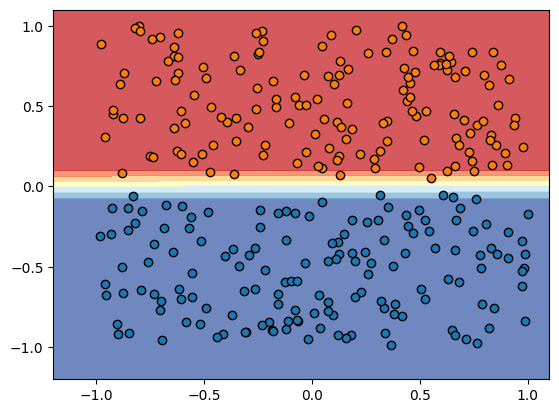

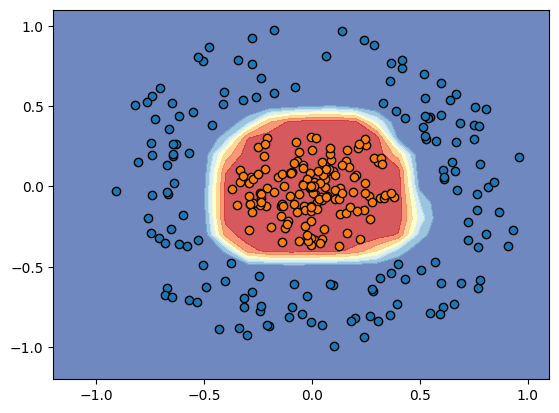

In [24]:
# define x and y scale
x1grid = np.arange(-1.2, 1.2, 0.1)
x2grid = np.arange(-1.2, 1.2, 0.1)

# create grid lines 
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
preds_lin = []
preds_circ = []
for i in range(grid.shape[0]):
    pred_lin = nn_lin.forward(grid[i]) 
    preds_lin.append(pred_lin)
    pred_circ = nn_circ.forward(grid[i]) 
    preds_circ.append(pred_circ)

# reshape the predictions back into a grid
preds_lin = np.array(preds_lin)
preds_circ = np.array(preds_circ)
grid_lin = preds_lin.reshape(xx.shape)
grid_circ = preds_circ.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
# plt.contourf(xx, yy, grid_lin, levels=1, cmap='RdYlBu_r', alpha = 0.75)
plt.contourf(xx, yy, grid_lin, cmap='RdYlBu_r', alpha = 0.75)
plt.scatter(class1_linear[:,0], class1_linear[:,1], label="Class 1", edgecolors='black')
plt.scatter(class2_linear[:,0], class2_linear[:,1], label="Class 2", edgecolors='black')
plt.show()
# plt.contourf(xx, yy, grid_circ, levels=1, cmap='RdYlBu_r', alpha = 0.75)
plt.contourf(xx, yy, grid_circ, cmap='RdYlBu_r', alpha = 0.75)
plt.scatter(class1_circular[:,0], class1_circular[:,1], label="Class 1", edgecolors='black')
plt.scatter(class2_circular[:,0], class2_circular[:,1], label="Class 2", edgecolors='black')
plt.show()
